## Assignment 1

In [223]:
import numpy as np
import matplotlib.pyplot as plt

In [224]:
# Khởi tạo dữ liệu
mean1 = [2, 2]
mean2 = [8, 3]
mean3 = [3, 6]
cov = [[1, 0], [0, 1]]

data1 = np.random.multivariate_normal(mean1, cov, 200)
data2 = np.random.multivariate_normal(mean2, cov, 200)
data3 = np.random.multivariate_normal(mean3, cov, 200)

X = np.vstack((data1, data2, data3))

In [225]:
# Hàm K-means
def kmeans(X, k, max_iters=100):
    n_samples = X.shape[0]
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    
    for i in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        if np.allclose(centroids, new_centroids):
            print(f"Converged at iteration {i}")
            break
        centroids = new_centroids
    
    return labels, centroids

In [226]:
# Trực quan hóa
def plot_clusters(X, labels, centroids, seed):
    plt.figure(figsize=(6, 5))
    cluster_colors = np.array(['red', 'green', 'blue'])
    colors = cluster_colors[labels]
    
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=250, label='Centroids')

    plt.title(f'K-Means Clustering (Seed = {seed})')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.tight_layout()
    plt.show()

Converged at iteration 32


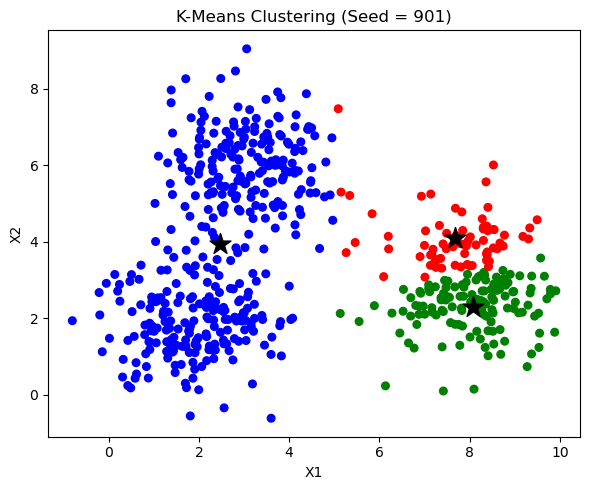

Converged at iteration 4


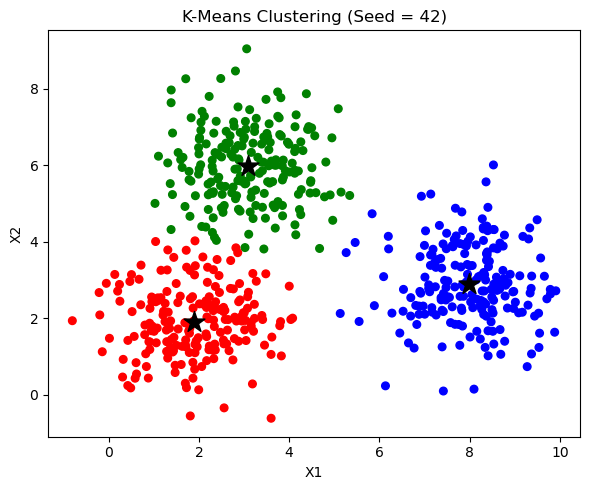

Converged at iteration 5


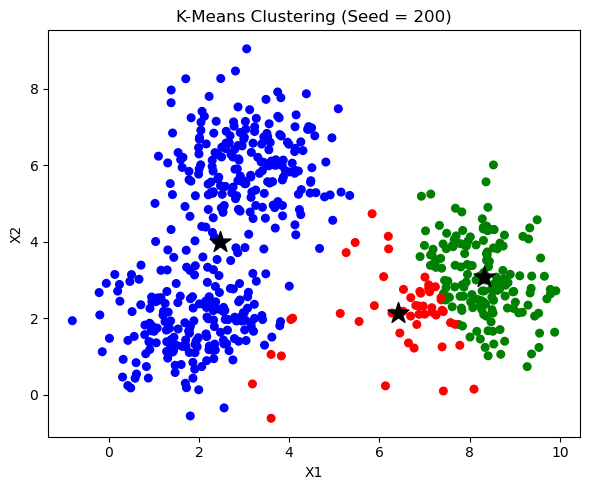

In [227]:
seeds = [901, 42, 200]

for seed in seeds:
    np.random.seed(seed)
    labels, centroids = kmeans(X, k=3)
    plot_clusters(X, labels, centroids, seed)

### Nhận xét
Qua 3 lần chạy với 3 seed ngẫu nhiên trên, ta có thể thấy được việc khởi tạo tâm cụm ban đầu ảnh hưởng lớn đến kết quả phân chia cuối cùng. Nếu như các điểm khởi tạo ban đầu nằm gần nhau, hoặc nói cách khác là rơi vào vùng không đại diện tốt cho dữ liệu, mô hình sẽ hội tụ vào các điểm local minimum và bị kẹt ở đó, dẫn đến các kết quả phân cụm khác nhau không được tối ưu nhất có thể. 

## Assignment 2

In [228]:
# Khởi tạo dữ liệu
data1 = np.random.multivariate_normal(mean1, cov, 50)
data2 = np.random.multivariate_normal(mean2, cov, 20)
data3 = np.random.multivariate_normal(mean3, cov, 1000)
X2 = np.vstack((data1, data2, data3))

Converged at iteration 13


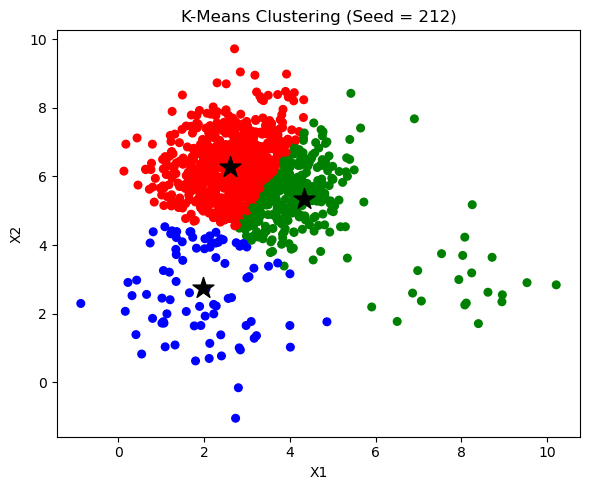

Converged at iteration 11


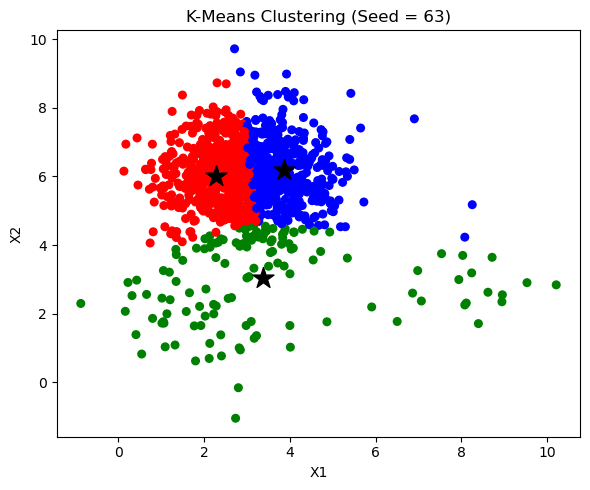

Converged at iteration 25


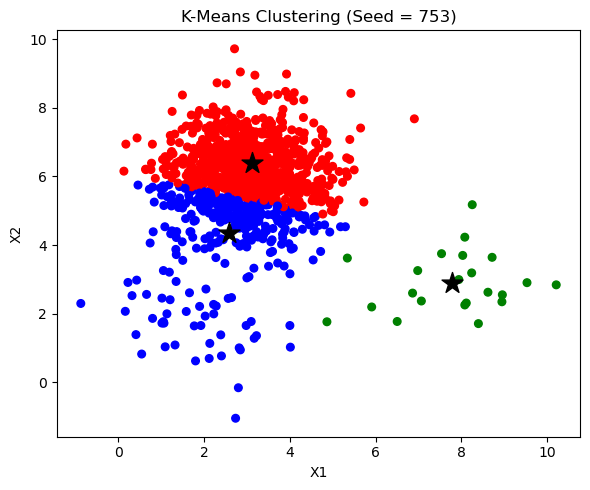

In [237]:
seeds = [212, 63, 753]

for seed in seeds:
    np.random.seed(seed)
    labels, centroids = kmeans(X2, k=3)
    plot_clusters(X2, labels, centroids, seed)

### Nhận xét

- Khi các cụm có kích thước không đồng đều, thuật toán K-Means sẽ có xu hướng bị thiên lệch về cụm lớn hơn. Cụ thể thì trong trường hợp này, cụm 1000 điểm sẽ chiếm vị trí centroid nhiều hơn vì khi chia ngẫu nhiên centroid, cụm này có số điểm dữ liệu nhiều nhất nên có khả năng là centroid sẽ có xác suất rơi vào vùng này cao hơn (khả năng này chỉ ở mức có thể xảy ra, không phải là nguyên nhân chính). 

- Lý do chính dẫn đến việc thiên lệch về cụm lớn đó là vì K-Means cố gắng tối thiểu tổng khoàng cách bình phương từ các điểm đến tâm cụm nên nếu như các điểm dữ liệu phân bố càng gần sát nhau thì trong quá trình cập nhật các centroid chắc chắn sẽ có xu hướng bị kéo về vùng gần sát nhau này, sở dĩ vì tổng sai số chắc chắn sẽ nhỏ hơn nhiều so với các điểm dữ liệu xa nhau, vì vậy dẫn đến tình trạng việc phân cụm cuối cùng sẽ không được tối ưu nhất có thể (cụm lớn bị tách ra, lẫn lộn cụm này với cụm kia, ...)

## Assignment 3

In [238]:
# Khởi tạo dữ liệu với phương sai khác nhau
cov1 = [[1, 0], [0, 1]]
cov2 = [[10, 0], [0, 1]]

data1 = np.random.multivariate_normal(mean1, cov1, 200)
data2 = np.random.multivariate_normal(mean2, cov1, 200)
data3 = np.random.multivariate_normal(mean3, cov2, 200)
X3 = np.vstack((data1, data2, data3))

In [242]:
# Trực quan hóa
def plot_clusters_variant(X, labels, centroids, seed):
    plt.figure(figsize=(6, 5))
    cluster_colors = np.array(['red', 'green', 'blue'])
    
    for i, color in enumerate(cluster_colors):
        points = X[labels == i]
        plt.scatter(points[:, 0], points[:, 1], c=color, s=30, label=f'Cluster {i}', alpha=0.8)

    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=250, label='Centroids')

    plt.title(f'K-Means Clustering (Seed = {seed})')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.tight_layout()
    plt.show()

Converged at iteration 18


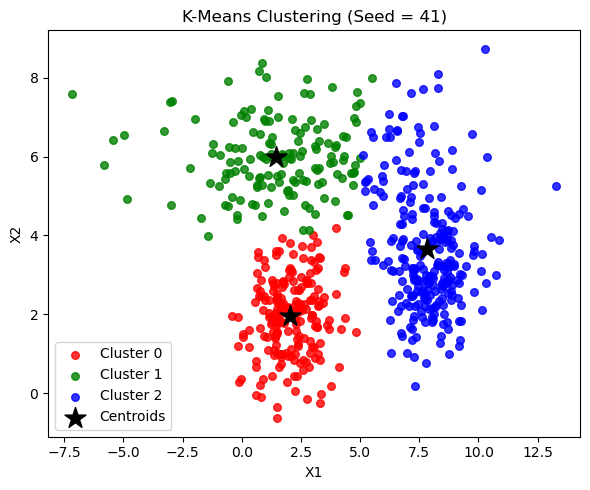

Converged at iteration 19


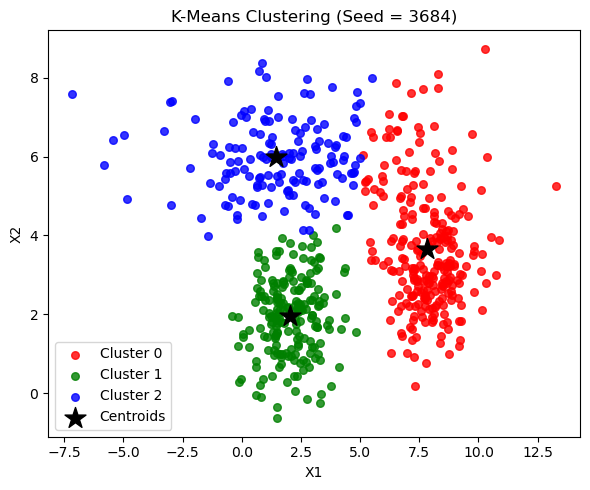

Converged at iteration 20


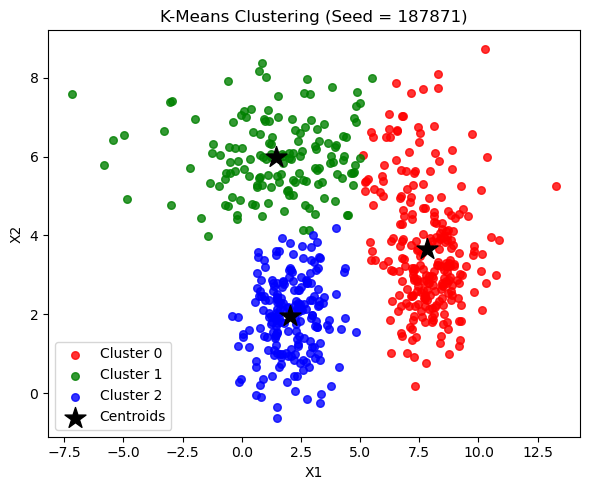

In [250]:
seeds = [41, 3684, 187871]

for seed in seeds:
    np.random.seed(seed)
    labels, centroids = kmeans(X3, k=3)
    plot_clusters_variant(X3, labels, centroids, seed)

### Nhận xét
Trong trường hợp này, cụm nằm trên cùng có phương sai lớn hơn theo trục hoành nên dẫn đến hình dạng bị kéo dãn ra theo phương ngang. Trong cả 3 hình, chúng ta có thể thấy phần bên phải của cụm nằm trên cùng đó luôn bị cụm bên dưới chiếm mất. Sở dĩ xảy ra việc này là vì K-Means là thuật toán giả định các cụm là hình cầu với độ phân tán đều nhau, vì vậy khi 1 cụm bị kéo dãn ra như thế này, khoảng cách giữa tâm cụm toàn cục với các điểm dữ liệu không còn sát nhau nữa, nên nếu như các cụm còn lại cũng nằm gần với ranh giới của cụm bị kéo dãn này thì khả năng cao là sẽ bị các cụm đấy chiếm mất đi 1 phần dữ liệu. Điều này có thể cho ta thấy được tầm quan trọng của phân bố dữ liệu và hạn chế lớn của thuật toán K-Means này. 